# 21 LIES, DAMNED LIES, AND STATISTICS


**There are lies, damned lies and statistics.** - Mark Twain 

---
**Statistical thinking** is a relatively new invention.

This started to change in the middle of the 17th century, most notably with the publication of
**John Graunt** ’s 

* **Natural and Political Observations Made Upon the Bills of Mortality**

Since that time people have used statistics as much to **mislead as to inform**.

* Some have  **willfully** used statistics to mislead;

* others have merely been **incompetent**

We trust that you will use this information only for good,

  * **a better consumer** 
  
  * **a more honest purveyor of statistical information**.

1 Garbage In Garbage Out (GIGO)

2 Tests Are Imperfect

3 Pictures Can Be Deceiving

4 Cum Hoc Ergo Propter Hoc

5 Statistical Measures Don’t Tell the Whole Story

6 Sampling Bias

7 Context Matters

8 Beware of Extrapolation

9 The Texas Sharpshooter Fallacy

10 Percentages Can Confuse

11 Statistically Significant Differences Can Be Insignificant

12 The Regressive Fallacy

13 Just Beware


## 21.1 Garbage In Garbage Out (GIGO)

If the input data is seriously flawed, no amount of statistical massaging will produce a meaningful result.

Calhoun’s (perhaps willfully) spurious response to Adams was based on a classical error, 

**the assumption of independence**

### Assumption of Independence

The assumption of independence is used for several other statistical tests.

It’s essential to getting results from your <b>sample</b> that reflect what you would find in a <b>population</b>. 

Even the smallest dependence in your data can turn into heavily biased results (which may be undetectable) if you violate this assumption.

A <b>dependence</b> is <b>a connection</b> between your data. For example, how much you earn depends upon how many hours you work. 

<b>Independence</b> means there <b>isn’t a connection</b>. For example, how much you earn isn’t connected to what you ate for breakfast. 

The <b>assumption of independence</b> means that your <b>data isn’t connected in any way</b> (at least, in ways that you haven’t accounted for in your model).

There are actually two assumptions: 

1 **The observations between groups should be independent,**

which basically means the groups are made up of different people. You don’t want one person appearing twice in two different groups as it could skew your results.
   

2 **The observations within each group must be independent.** 

If two or more data points in one group are connected in some way, this could also skew your data. For example, let’s say you were taking a snapshot of how many donuts people ate, and you took snapshots every morning at 9,10, and 11 a.m.. You might conclude that office workers eat 25% of their daily calories from donuts. However, you made the mistake of timing the snapshots too closely together in the morning when people were more likely to bring bags of donuts in to share (making them dependent). If you had taken your measurements at 7, noon and 4 p.m., this would probably have made your measurements independent.

#### How do I Avoid Violating the Assumption?

Unfortunately, looking at your data and trying to see if you have independence or not is usually difficult or impossible. 

The key to avoiding violating the assumption of independence is to make sure your data is independent while you are collecting it. If you aren’t an expert in your field, this can be challenging.


##21.2 Tests Are Imperfect

**Every experiment should be viewed as a `potentially flawed` test**. We can perform a test for a chemical, a phenomenon, a disease, etc. However, the event for which we are testing is not necessarily the same as the result of the test.

Professors design exams with the goal of understanding how well a student has mastered some subject matter, but the result of the exam should not be confused with how much a student actually understands. 

Every test has some inherent error rate. Imagine that a student learning a second language has been asked to learn the meaning of 100 words, but has learned the meaning of only 80 of them. His rate of understanding is 80%, but the probability that he will score 80% on a test with 20 words is certainly not 1.

**Tests can have both false negatives and false positives**. As we saw in Chapter 20, a negative mammogram does not guarantee absence of breast cancer, and a positive mammogram doesn’t guarantee its presence. Furthermore, the test probability and the event probability are not the same thing. This is especially relevant when testing for a rare event, e.g., the presence of a rare disease. If the cost of a false  negative is high(e.g., missing the presence of a serious but curable disease), the test should be designed to be highly sensitive, even at the cost of there being a large number of false positives.



## 21.3 Pictures Can Be Deceiving

There can be no doubt about the utility of graphics for quickly conveying information. However, when used carelessly (or maliciously) a plot can be highly misleading.

Consider, for example, the following charts depicting housing prices in the U.S. Midwestern states.
<img src="./img/162.PNG"/> 

Looking at the chart on the left, it seems as if housing prices were <b>pretty stable</b> from 2006-2009.

But wait a minute, wasn’t there <b>a collapse of U.S. residential real estate</b> followed by a global financial crisis in late 2008? There was indeed, as shown in <b>the chart on the right</b>.

The first chart was <b>designed to give the impression</b> that housing prices had been <b>stable</b>.

On the y-axis, the designer used <b>a logarithmic scale</b> ranging from the absurdly low average price for a house of <b>10,000</b> to the improbably high average price of <b>1 million</b>. This <b>minimized the amount of space</b> devoted to the area where prices are changing, giving the impression that the changes were relatively small.

The chart above and on the right was <b>designed to give the impression</b> that housing prices <b>moved erratically, and then crashed</b>.

The designer used <b>a linear scale and a narrow range of prices</b>, so the sizes of the changes were <b>exaggerated</b>.

The next code produces the two plots we looked at above and <b>a plot intended to give an accurate impression of the movement of housing prices</b>

In [1]:
%%file ./data/midWestHousingPrices.txt
2006 01 210700
2006 02 203100
2006 03 216800
2006 04 216200
2007 01  212800
2007 02  203200
2007 03  209600
2007 04  197400
2008 01 219200
2008 02 198500
2008 03 184700
2008 04 202500
2009 01  187100
2009 02  193200
2009 03  184900
2009 04  196000

Overwriting ./data/midWestHousingPrices.txt


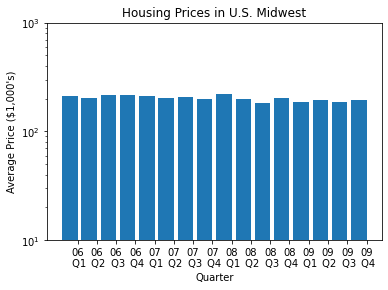

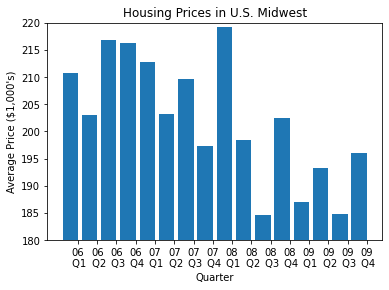

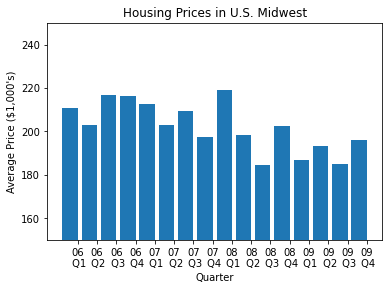

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

def midWestHousingPrices():
    f = open('./data/midWestHousingPrices.txt', 'r')
    
    #Each line of file contains year quarter price
    #for Midwest region of U.S.
    
    labels, prices = ([], [])
    for line in f:
        year, quarter, price = line.split()
        
        label = year[2:4] + '\n Q' + quarter[1]
        labels.append(label)
        prices.append(float(price)/1000)
    
    f.close()
    
    return labels, prices

def plotHousing(impression):
    """Assumes impression a str.  Must be one of 
         'flat','volatile,' and 'fair'
       Produce bar chart of housing prices over time"""
    quarters =np.arange(len(labels)) # x coords of bars
    width = 0.8 #Width of bars
    
    plt.figure()
    
    if impression == 'flat':
        plt.semilogy()
        
    plt.bar(quarters, prices, width)
    plt.xticks(quarters+width/2.0, labels)
    plt.title('Housing Prices in U.S. Midwest')
    plt.xlabel('Quarter')
    plt.ylabel('Average Price ($1,000\'s)')
    
    if impression == 'flat':
        plt.ylim(10, 10**3)
    elif impression == 'volatile':
        plt.ylim(180, 220)
    elif impression == 'fair':
        plt.ylim(150, 250)
    else:
        raise ValueError

labels, prices = ([], [])
labels, prices=midWestHousingPrices()

plotHousing('flat')
plotHousing('volatile')
plotHousing('fair')
plt.show()


It uses two plotting facilities that we have not yet seen. 

* **plt.bar**

* **plt.xticks**

```python
plt.bar(quarters, prices, width) 
```
produces a bar chart with `width` wide bars. The left edges of the bars are the values of the elements of quarters and
the heights of the bars are the values of the corresponding elements of prices.

```python
plt.xticks(quarters+width/2.0, labels) 
```
describes the labels associated with the bars. 

 * The first argument: `quarters+width/2.0`:  specifies where each label is to be placed 

 * The second argument:`labels` : the text of the labels. 

The function `yticks` behaves analogously.

## 21.3 Cum Hoc Ergo Propter Hoc

Statisticians, like attorneys and physicians, sometimes use Latin for no obvious reason
other than to seem erudite. This phrase means, “with this, therefore because of this.”

When two things are <b>correlated</b>, there is a temptation to assume that one has <b>caused</b> the other.

#### But Correlation does not imply causation!

there is some <b>lurking variable</b> that we have not considered that causes each.

Given enough retrospective data, it is <b>always possible to find two variables that are correlated </b>
<img src="./img/163.PNG"/>

When such correlations are found, the first thing to do is to <b>ask whether there is a plausible theory explaining the
correlation</b>.

Falling prey to the `cum hoc ergo propter hoc` fallacy can be <b>quite dangerous</b>.





## 21.5 Statistical Measures Don’t Tell the Whole Story

There are an enormous number of different statistics that can be extracted from a data set.

By carefully choosing among these, it is possible to convey <b>a variety of different impressions about the same data</b>. 

A good **antidote** is to **look at the data set itself**.

### 21.5.1 F.J. Anscombe's Data Sets

In 1973, the statistician F.J. Anscombe published a paper containing the table below. It contains the <x, y> coordinates of the points in each of four data sets. 

Each of the four data sets has 

* the same mean value for x (9.0), the same mean value for y (7.5), 

* the same variance for x (10.0), the same variance for y (3.75),

* the same correlation between x and y (0.816)

* if we use linear regression to fit a line to each, we get the same result for each, y = 0.5x + 3.

|x0 |y0|x1|y1|x2|y2|x3|y3|
| ---- |:------:| :------:| :------:|  :------:| :------:| :------:|  ----:|
|10.0|	8.04 |	10.0|	9.14 |	10.0 	|7.46	|8.0    |6.58|
|8.0| 	6.95 |	8.0 |	8.14 |	8.0     |6.77	|8.0    |5.76|
|13.0| 	7.58 |	13.0|	8.74 |	13.0    |12.74	|8.0    |7.71|
|9.0|	8.81 |	9.0 |	8.77 |	9.0     |7.11	|8.0    |8.84|
|11.0| 	8.33 |	11.0|	9.26|	11.0    |7.81	|8.0    |8.47|
|14.0| 	9.96 |	14.0|	8.10 |	14.0    |8.84	|8.0    |7.04|
|6.0|	7.24 |	6.0 |	6.13 |	6.0     |6.08	|8.0 	|5.25|
|4.0| 	4.26 |	4.0 |	3.10| 	4.0     |5.39	|19.0 	|12.5|
|12.0|	10.84| 	12.0| 	9.13| 	12.0    |8.15	|8.0 	|5.56|
|7.0| 	4.82 | 	7.0 |	7.26| 	7.0     |6.42	|8.0 	|7.91|
|5.0| 	5.68 | 	5.0 | 	4.74| 	5.0     |5.73	|8.0 	|6.89|




Does this mean that there is no obvious way to distinguish these data sets from
each other? No, one simply needs to plot the data to see that the data sets are
not at all alike.

![164curve](./img/164curve.PNG)


<b style="font-size:120%;color:bluer"> The moral is simple: if possible, always take a look at some representation of the raw data.</b>


You may use `statistics,scipy` for Statistical Measures

`statistics.mean(data)`

* Return the sample arithmetic mean of data which can be a sequence or iterator.

`statistics.pvariance(data, mu=None)`

* Return the population variance of data, a non-empty iterable of real-valued numbers

**Pearson correlation**

$r=\frac{\sum_{i=1}^n (X_i- \overline X)(Y_i- \overline Y)}{ \sqrt{ \sum_{i=1}^n (X_i- \overline X)^2} \cdot \sqrt{ \sum_{i=1}^n (Y_i- \overline Y)^2}  }$

`scipy.stats.pearsonr(x, y)`

* Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.

In [2]:
from  statistics import mean,pvariance
from scipy.stats import pearsonr

x0=[10.0, 8.0,13.0, 9.0,11.0,
    14.0, 6.0, 4.0,12.0, 7.0,5.0]
y0=[8.04,6.95,7.58,8.81,8.33,
    9.96,7.24,4.26,10.84,4.82,5.68]
print('statistics.mean:')
print('\t X0:',mean(x0))
print('\t Y0:',mean(y0))
print('statistics.pvariance:')
print('\t X0:',pvariance(x0))
print('\t Y0:',pvariance(y0))
print('corrcoef:')
print('\t stats.pearsonr',pearsonr(x0,y0)[0])

statistics.mean:
	 X0: 9.0
	 Y0: 7.500909090909091
statistics.pvariance:
	 X0: 10.0
	 Y0: 3.752062809917356
corrcoef:
	 stats.pearsonr 0.81642051634484


### 21.5.2 Analyzing with Numpy and Matplotlib

In [1]:
%%file ./data/anscombe.csv
x0,y0,x1,y1,x2,y2,x3,y3
10.00 ,8.04 ,10.00 ,9.14 ,10.00 ,7.46 ,8.00 ,6.58 
8.00 ,6.95 ,8.00 ,8.14 ,8.00 ,6.77 ,8.00 ,5.76 
13.00 ,7.58 ,13.00 ,8.74 ,13.00 ,12.74 ,8.00 ,7.71 
9.00 ,8.81 ,9.00 ,8.77 ,9.00 ,7.11 ,8.00 ,8.84 
11.00 ,8.33 ,11.00 ,9.26 ,11.00 ,7.81 ,8.00 ,8.47 
14.00 ,9.96 ,14.00 ,8.10 ,14.00 ,8.84 ,8.00 ,7.04 
6.00 ,7.24 ,6.00 ,6.13 ,6.00 ,6.08 ,8.00 ,5.25 
4.00 ,4.26 ,4.00 ,3.10 ,4.00 ,5.39 ,19.00 ,12.50 
12.00 ,10.84 ,12.00 ,9.13 ,12.00 ,8.15 ,8.00 ,5.56 
7.00 ,4.82 ,7.00 ,7.26 ,7.00 ,6.42 ,8.00 ,7.91 
5.00 ,5.68 ,5.00 ,4.74 ,5.00 ,5.73 ,8.00 ,6.89 

Writing ./data/anscombe.csv


#### 1 Load data from a text file

**[numpy.genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)** ：Load data from a text file, with missing values handled as specified. 
   

In [2]:
import numpy as np
vec = np.genfromtxt('./data/anscombe.csv', skip_header=1, delimiter=',', dtype=None)
vec

array([[10.  ,  8.04, 10.  ,  9.14, 10.  ,  7.46,  8.  ,  6.58],
       [ 8.  ,  6.95,  8.  ,  8.14,  8.  ,  6.77,  8.  ,  5.76],
       [13.  ,  7.58, 13.  ,  8.74, 13.  , 12.74,  8.  ,  7.71],
       [ 9.  ,  8.81,  9.  ,  8.77,  9.  ,  7.11,  8.  ,  8.84],
       [11.  ,  8.33, 11.  ,  9.26, 11.  ,  7.81,  8.  ,  8.47],
       [14.  ,  9.96, 14.  ,  8.1 , 14.  ,  8.84,  8.  ,  7.04],
       [ 6.  ,  7.24,  6.  ,  6.13,  6.  ,  6.08,  8.  ,  5.25],
       [ 4.  ,  4.26,  4.  ,  3.1 ,  4.  ,  5.39, 19.  , 12.5 ],
       [12.  , 10.84, 12.  ,  9.13, 12.  ,  8.15,  8.  ,  5.56],
       [ 7.  ,  4.82,  7.  ,  7.26,  7.  ,  6.42,  8.  ,  7.91],
       [ 5.  ,  5.68,  5.  ,  4.74,  5.  ,  5.73,  8.  ,  6.89]])

**np.array**

In [3]:
vec.shape

(11, 8)

In [4]:
# row 2+1,colume 3+1
vec[2,3]

8.74

In [5]:
# all row,column 1
vec[:,1]

array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

#### 2 Statistical Measures

[numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)： Compute the arithmetic mean along the specified axis.

[numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)： Compute the variance along the specified axis.

[numpy.corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)：Return Pearson product-moment correlation coefficients.



In [6]:
groupcount=vec.shape[1]//2
# rows:4 group, columns: 2 (x,y)
means = np.zeros(shape=(groupcount,2))
pvars = np.zeros(shape=(groupcount,2))
corrcoefs = np.zeros(groupcount)
for i in range(groupcount):
    means[i]=[np.mean(vec[:,i*2]),np.mean(vec[:,1+i*2])]
    pvars[i]=[np.var(vec[:,i*2]),np.var(vec[:,1+i*2])]
    corrcoefs[i]=np.corrcoef(vec[:,i*2],vec[:,1+i*2])[0,1]
print(means)  
print(pvars)
print(corrcoefs)

[[9.         7.50090909]
 [9.         7.50090909]
 [9.         7.5       ]
 [9.         7.50090909]]
[[10.          3.75206281]
 [10.          3.75239008]
 [10.          3.74783636]
 [10.          3.74840826]]
[0.81642052 0.81623651 0.81628674 0.81652144]


####  3 Linear Regression

**[numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)**

* Least squares polynomial fit.Fit a polynomial $p(x) = p[0] * x^{deg} + ... + p[deg]$ of degree deg to points $(x, y)$. Returns a vector of coefficients $p$ that minimises the squared error.

In [7]:
a = np.zeros(groupcount)
b= np.zeros(groupcount)
for i in range(groupcount):
    a[i],b[i] = np.polyfit(vec[:,i*2],vec[:,1+i*2], 1)
    print(a[i],b[i])

0.5000909090909094 3.000090909090908
0.5000000000000003 3.00090909090909
0.49972727272727313 3.0024545454545453
0.4999090909090908 3.001727272727274


#### 4 Plotting：Subplot

[matplotlib.pyplot.figure.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html): 

Add a **subplot** to the current figure

```python
subplot(nrows, ncols, index)
```
[matplotlib.pyplot.subplots_adjust](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html): 

Tune the **subplot** layout

```python
subplots_adjust(left=None, bottom=None, right=None, top=None)
```


In [8]:
import math
import matplotlib.pyplot as plt

def plotData(x,y,i,ai,bi,fx,fy):
    plt.title('No: '+str(i+1))
    plt.xlabel('x')
    plt.ylabel('y')
    # data points
    plt.plot(x,y, 'bo')
    
    # the linear fit line  
    streq="$y={:.5f}x+{:.5f}$".format(ai, bi)
    _label= "Linear Regression:$y=f(x)$"+"\n"+streq
    plt.plot(fx, fy, 'k-',label=_label)
    
    plt.legend(loc='best')

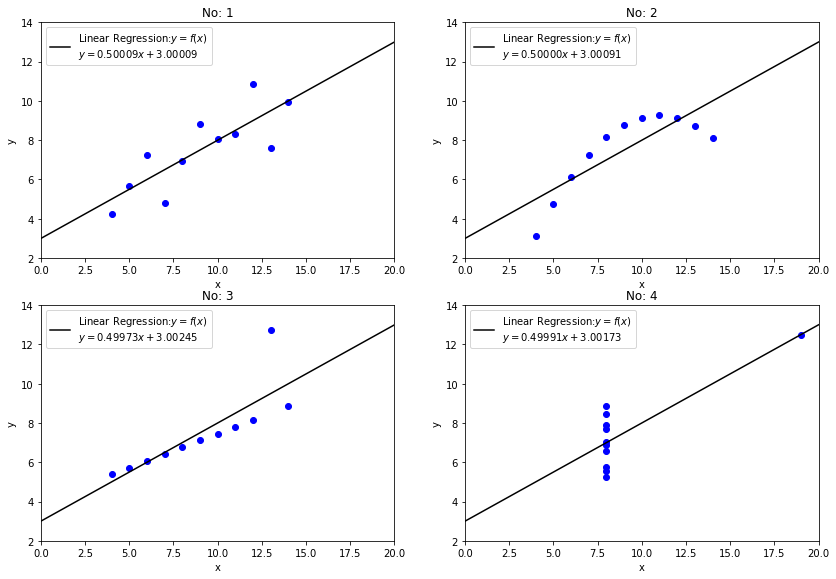

In [9]:
   
figcol=2
figrow=math.ceil(groupcount/figcol)

fig=plt.figure(figsize=(12.0,8.0))

fig.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95)

for i in range(groupcount):
    #  plt.subplot
    plt.subplot(figrow, figcol,i+1)
    plt.xlim(0 ,20)
    plt.ylim(2 ,14)
    
    fx=np.array([0,20])
    fy=a[i]*fx+b[i]
    
    plotData(vec[:,i*2],vec[:,1+i*2],i,a[i],b[i],fx,fy)

plt.savefig("./img/Anscombe.svg")
plt.show()   

## 21.6 Sampling Bias

####  non-response bia

During World War II, whenever an Allied plane would return from a mission over Europe the plane would be inspected to see where the flak had impacted. Based upon this data, mechanics reinforced those areas of the planes that seemed most likely to be hit by flak.

What’s wrong with this? They did not inspect the planes that failed to return from missions because they had been downed by flak. Perhaps these unexamined planes failed to return precisely because they were hit in the places
where the flak would do the most damage. 

This particular error is called <b>non-response bias</b>.

#### sampling a subset of a population we can infer things about the population as a whole?

All statistical techniques are based upon the assumption that by sampling a subset of a population we can infer things about the population as a whole.

Unfortunately, many studies, particularly in the social sciences, are based on what has been called <b>convenience (or accidental) sampling</b>.


A convenience sample <b>might be</b> representative, but there is no way of knowing <b>whether it actually</b> is
representative.

The Family Research Institute’s Web site contains a table with the following information:
<img src="./img/165.PNG"/>
Pretty scary stuff if your sexual preference is other than heterosexual—until one  looks at how the data was compiled.

How does one go about evaluating such a sample? 

One technique is to <b>compare data compiled from the sample against data compiled elsewhere</b>


## 21.7 Context Matters

It is easy to read more into the data than it actually implies, especially when viewing the data <b>out of context</b>.

Opponents of government initiatives to reduce the prevalence of guns in the U.S. are fond of quoting the statistic that roughly <b>99.8%</b> of the firearms in the U.S. will not be used to commit a violent crime in any given year. 

Does this mean that there is <b>not much gun violence in the U.S</b>? 

**NO!**

The National Rifle Association reports that that there are roughly 300 million privately owned firearms in the
U.S.—<b>0.2%</b> of 300 million is <b>600,000</b>.

## 21.8 Beware of Extrapolation

It is all too easy to extrapolate from data.

Extrapolation should be done <b>only</b> when one has <b>a sound theoretical justification</b> for doing so.

## 21.9 The Texas Sharpshooter Fallacy

Imagine that you are driving down a country road in Texas. You see a barn that has six targets painted on it, and a bullet hole at the very center of each target.

“Yes sir,” says the owner of the barn,“I never miss.” “That’s right,” says his spouse, “there ain’t a man in the state of Texas who’s more accurate with a paint brush.”

Got it? <b>He fired the six shots, and then painted the targets around them</b>.

A classic of the genre appeared in 2001.108 It reported that a research team at the Royal Cornhill hospital in Aberdeen had discovered that “anorexic women are most likely to have been born in the spring or early summer… Between March and June there were 13% more anorexics born than average, and 30% more in June itself.”

#### Let’s look at that worrisome statistic for those women born in June.

Let’s write a short program to see if we can reject the null hypothesis that this occurred purely by chance.


In [10]:
import random

def juneProb(numTrials):
    june48 = 0
    for trial in range(numTrials):
        june = 0
        for i in range(446):
            if random.randint(1,12) == 6:
                june += 1
        if june >= 48:
            june48 += 1
    jProb = june48/float(numTrials)
    print('Probability of at least 48 births in June =', jProb)


In [11]:
juneProb(10000)

Probability of at least 48 births in June = 0.0411


It looks as if the probability of at least 48 babies being born in June purely by chance is around 4.5%.

Well, they might have been on to something had they started with the hypothesis that more babies who will become anorexic are born in June, and then run a study designed to check that hypothesis.

#### But that is not what they did. 
Instead, they looked at the data and then, imitating the Texas sharpshooter, drew a circle around June.

The right statistical question to have asked is what is <b>the probability</b> that there was <b>at least one month</b> (out of 12) in which at least 48 babies were born.



In [12]:
def anyProb(numTrials):
    anyMonth48 = 0
    for trial in range(numTrials):
        months = [0]*12
        for i in range(446):
            months[random.randint(0,11)] += 1
        if max(months) >= 48:
            anyMonth48 += 1
    aProb = anyMonth48/float(numTrials)
    print('Probability of at least 48 births in some month =', aProb)


In [13]:
anyProb(10000)

Probability of at least 48 births in some month = 0.4419


It appears that it is not so unlikely after all that the results reported in the study reflect <b>a chance occurrence</b> rather <b>a real association between birth month and anorexia</b>.

One doesn’t have to come from Texas to fall victim to the Texas Sharpshooter Fallacy.

What next steps might the Aberdeen group have taken to test their newfound hypothesis?

One possibility is to conduct <b>a prospective study</b>. In a prospective study, one starts with a set of hypotheses and then gathers data with the potential to either refute or confirm the hypothesis. If the group conducted a new study and got similar results, one might be convinced. Prospective studies can be expensive and time consuming to perform.

Prospective studies can be expensive and time consuming to perform.

In <b>a retrospective study</b>, one has to examine existing data in ways that reduce the likelihood of getting misleading results. One common technique, as discussed in Chapter 15, is to split the data into <b>a training set</b> and <b>a holdout set</b>.

## 21.10 Percentages Can Confuse

When thinking about percentages, we always need to pay attention to the basis on which the percentage is computed.

Percentages can be particularly misleading when applied to a small basis

## 21.11 Statistically Significant Differences Can Be Insignificant

An admissions officer at the Maui Institute of Technology (MIT), wishing to convince
the world that MIT’s admissions process is “gender-blind,” trumpeted, “At MIT, there
is no significant difference between the grade point averages of men and women.” The
same day, an ardent female chauvinist proclaimed that “At MIT, the women have a
significantly higher grade point average than the men.” A puzzled reporter at the student
newspaper decided to examine the data and expose the liar. But when she finally
managed to pry the data out of the university, she concluded that both were telling the
truth.

What does the sentence, “At MIT, the women have a significantly higher grade point
average than the men,” actually mean? People who have not studied statistics (most of
the population) would probably conclude that there is a “meaningful” difference
between the GPAs of women and men attending MIT. In contrast, those who have
recently studied statistics might conclude only that 1) the average GPA of women is
higher than that of men, and 2) the null hypothesis that the difference in GPA can be
attributed to randomness can be rejected at the 5% level

Suppose, for example, that there were 2500 women and 2500 men studying at MIT.
Suppose further that the mean GPA of men was 3.5, the mean GPA of women was 3.51,
and the standard deviation of the GPA for both men and women was 0.25. Most
sensible people would consider the difference in GPAs “insignificant.” However, from
a statistical point of view the difference is “significant” at close to the 2% level. What
is the root of this strange dichotomy? As we showed in Section 19.5, when a study has
enough power—i.e, enough examples—even insignificant differences can be
statistically significant.


A related problem arises when a study is very small. Suppose you flipped a coin
twice and it came up heads both times. Now, let’s use the two-tailed one-sample t-test
we saw in Section 19.3 to test the null hypothesis that the coin is fair. If we assume that
the value of heads is 1 and the value of tails is 0, we can get the p-value using the code
stats.ttest_1samp([1, 1], 0.5)[1]

It returns a p-value of 0, indicating that if the coin is fair the probability of getting two
consecutive heads is nil.

## 21.12 The Regressive Fallacy

The regressive fallacy occurs when people fail to take into account the `natural fluctuations of events`.


All athletes have good days and bad days. When they have good days, they try not to change anything. When they have a series of unusually bad days, however, they often try to make changes. Whether or not the changes are actually constructive, regression to the mean (Section 15.3) makes it likely that over the next few days the athlete’s performance will be better than the unusually poor performances preceding the changes.But that may not stop the athlete from assuming that there is a treatment effect, i.e.,
attributing the improved performance to the changes he or she made.


The Nobel prize-winning psychologist Daniel Kahneman tells a story about anIsraeli Air Force flight instructor who rejected Kahneman’s assertion that “rewards for improved performance work better than punishment for mistakes.” The instructor’s argument was “On many occasions I have praised flights cadets for clean execution of some aerobatic maneuver. The next time they try the same maneuver they usually do worse. On the other hand, I have often screamed into a cadet’s earphone for bad execution, and in general he does better on the next try.”153 It is natural for humans to imagine a treatment effect, because we like to think causally. But sometimes it is simply a matter of luck.

Imagining a treatment effect when there is none can be dangerous. It can lead to the belief that vaccinations are harmful, that snake oil cures all aches and pains, or that investing exclusively in mutual funds that “beat the market” last year is a good strategy.

![21.12](./img/21-12.jpg)


## 21.13 Just Beware

It would be easy, and fun, to fill a few hundred pages with a history of statistical abuses. 

But by now you probably got the message: 

<p style="font-size:150%;font-weight:700;color:blue;text-align:left"> It’s just as easy to lie with numbers as it is to lie with words<p>

Make sure that you understand what is actually being measured and how those “statistically significant” results were
computed before you jump to conclusions.

As Darrell Huff said, 

* **“`If you torture the data long enough, it will confess to anything`.”**

